# Теория графов, алгоритмы и применение в ML/DL

## 1. Что такое графы?

**Граф** — это структура данных, состоящая из:
- **вершин (nodes, vertices)** — объекты (люди, города, сайты и т.д.)
- **рёбер (edges)** — связи между вершинами (дружба, дорога, ссылка и т.д.)

### Виды графов:
- **Ненаправленный граф** — связь двусторонняя (A ↔ B)  
- **Направленный граф (ориентированный)** — связь односторонняя (A → B)
- **Взвешенный граф** — каждому ребру приписан вес (например, расстояние)
- **Невзвешенный граф** — все рёбра равны по "стоимости"
- **Циклический / ациклический граф**
- **Связный / несвязный граф**


### Пример в Python (с библиотекой networkx)

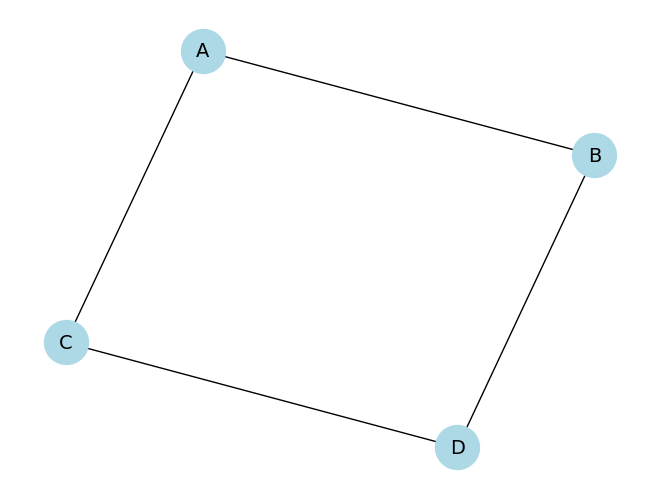

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edges_from([('A', 'B'), ('A', 'C'), ('B', 'D'), ('C', 'D')])

nx.draw(G, with_labels=True, node_color='lightblue', node_size=1000, font_size=14)
plt.show()


## 2. Основные алгоритмы на графах

### 🔹 2.1 Поиск в ширину (BFS)
- Используется для нахождения кратчайшего пути в **невзвешенном графе**
- Основан на очереди (FIFO)
- Применяется: социальные сети (поиск друзей), сетевые маршруты



In [5]:
from collections import deque

def bfs(graph, start):
    visited = set()
    queue = deque([start])
    while queue:
        v = queue.popleft()
        if v not in visited:
            visited.add(v)
            print(v, end=' ')
            queue.extend(set(graph[v]) - visited)

graph = {
    'A': ['B', 'C'],
    'B': ['D'],
    'C': ['D'],
    'D': []
}

bfs(graph, 'A')


A C B D 

### 🔹 2.2 Поиск в глубину (DFS)
- Использует стек (рекурсию)
- Применяется: проверка связности, топологическая сортировка, поиск циклов


In [7]:
def dfs(graph, start, visited=None):
    if visited is None:
        visited = set()
    visited.add(start)
    print(start, end=' ')
    for neighbor in graph[start]:
        if neighbor not in visited:
            dfs(graph, neighbor, visited)
            
dfs(graph, 'A')


A B D C 

### 🔹 2.3 Алгоритм Дейкстры
- Находит **кратчайший путь** в **взвешенном графе** без отрицательных весов
- Используется в GPS, навигации, сетевых маршрутах

In [8]:
import heapq

def dijkstra(graph, start):
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    pq = [(0, start)]

    while pq:
        curr_dist, node = heapq.heappop(pq)
        if curr_dist > distances[node]:
            continue
        for neighbor, weight in graph[node].items():
            distance = curr_dist + weight
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                heapq.heappush(pq, (distance, neighbor))
    return distances

graph_w = {
    'A': {'B': 1, 'C': 4},
    'B': {'C': 2, 'D': 5},
    'C': {'D': 1},
    'D': {}
}

dijkstra(graph_w, 'A')


{'A': 0, 'B': 1, 'C': 3, 'D': 4}

### 🔹 2.4 Алгоритм Крускала и Прима
- Используются для **поиска минимального остовного дерева (MST)**  
- Применяются в электросетях, оптимизации маршрутов и кабелей

**Kruskal:** добавляет рёбра по возрастанию веса, избегая циклов  
**Prim:** растит дерево из одной вершины

---

## 3. Применение графов в реальной жизни

| Сфера | Пример использования |
|-------|----------------------|
| Социальные сети | Связи между пользователями, рекомендации друзей |
| Интернет | Ссылки между страницами (Google PageRank) |
| Транспорт | Навигация, оптимизация маршрутов |
| Биология | Белковые взаимодействия, гены |
| Рекомендательные системы | Анализ связей между пользователями и товарами |

---

## 4. Графы в машинном обучении и нейронных сетях

### 4.1 Применение в ML
- Представление данных в виде **графов** позволяет моделировать сложные связи:
  - Социальные сети (узлы — пользователи)
  - Рекомендательные системы (узлы — пользователи и товары)
  - Химические молекулы (атомы и связи)
  - Знаниевые графы (Knowledge Graphs)

### 4.2 Графовые нейронные сети (GNNs)
**Graph Neural Networks (GNN)** — нейросети, работающие **не с матрицами, а с графами.**

Идея:
- Каждый узел имеет **вектор признаков**
- Узлы **обмениваются информацией** с соседями ("сообщения")
- После нескольких итераций узел знает контекст своей окрестности

### Основные типы:
| Модель | Суть | Применение |
|--------|------|-------------|
| **GCN (Graph Convolutional Network)** | Аналог свёртки, но для графов | Классификация узлов |
| **GraphSAGE** | Семплирование соседей узла | Рекомендации, соц. сети |
| **GAT (Graph Attention Network)** | Веса внимания для соседей | Более точная передача контекста |
| **R-GCN (Relational GCN)** | Учитывает типы связей | Знаниевые графы, NLP |

---

## 5. Успешные применения GNN

| Сфера | Пример | Результат |
|-------|---------|------------|
| Социальные сети | LinkedIn, Pinterest, Twitter | Рекомендации друзей, контента |
| Рекомендательные системы | Amazon, Alibaba | Улучшение рекомендаций на графах |
| Химия и медицина | DeepMind, MoleculeNet | Предсказание свойств молекул |
| Знаниевые графы | Google Knowledge Graph | Понимание смысловых связей |
| Компьютерное зрение | Scene Graphs | Анализ объектов и их отношений |

---

## 6. Ключевые понятия в графовом ML

| Термин | Объяснение |
|--------|-------------|
| **Node embedding** | Преобразование узлов графа в векторы |
| **Message passing** | Передача информации между соседями |
| **Adjacency matrix** | Матрица связей между вершинами |
| **Aggregation** | Сбор признаков от соседей |
| **Pooling** | Сжатие подграфов (аналог max-pooling в CNN) |

---

## 7. Полезные библиотеки
- **NetworkX** — базовая работа с графами
- **DGL (Deep Graph Library)** — нейросети на графах
- **PyTorch Geometric (PyG)** — GNN в PyTorch
- **StellarGraph** — удобна для рекомендаций и node classification

---

## 8. Пример: обучение GNN


In [9]:
# Пример с PyTorch Geometric (устанавливается отдельно)
# pip install torch-geometric torch-sparse torch-scatter

# from torch_geometric.datasets import KarateClub
# from torch_geometric.nn import GCNConv
# import torch.nn.functional as F
# import torch

# dataset = KarateClub()
# data = dataset[0]

# class GCN(torch.nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.conv1 = GCNConv(dataset.num_features, 16)
#         self.conv2 = GCNConv(16, dataset.num_classes)
    
#     def forward(self, data):
#         x, edge_index = data.x, data.edge_index
#         x = F.relu(self.conv1(x, edge_index))
#         x = F.dropout(x, training=self.training)
#         x = self.conv2(x, edge_index)
#         return F.log_softmax(x, dim=1)

# model = GCN()
# print(model)

## Итог

- **Графы** — универсальный способ моделировать связи между объектами.  
- **Классические алгоритмы (BFS, DFS, Dijkstra, Kruskal)** — основа многих приложений.  
- В **ML/DL** графы стали особенно важны:  
  - для **социальных сетей, рекомендаций, биоинформатики, NLP**  
  - графовые нейросети (**GNN, GCN, GraphSAGE, GAT**) активно развиваются  
- Это одно из **самых перспективных направлений Deep Learning** в последние годы.
